### 線形回帰・Ridge回帰・Lasso回帰

（社内技術発表用）

### モジュール・データの準備

In [39]:
import numpy as np
import pandas as pdz
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import AlphaSelection
from sklearn.feature_selection import RFE

In [21]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('X:', X.shape)
print('y:', y.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X: (506, 104)
y: (506,)
X_train: (379, 104)
y_train: (379,)
X_test: (127, 104)
y_test: (127,)


### 線形回帰

In [22]:
lr = LinearRegression().fit(X_train, y_train)

# 決定係数（回帰モデルの予測の正確さを測る指標）
print('Train set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

Train set score: 0.9520519609032729
Test set score: 0.6074721959665842


訓練データに対して予測のスコアが高く、テストデータに対して低いということは<br>
作成したモデルが下図のように、過学習を起こしているということである。

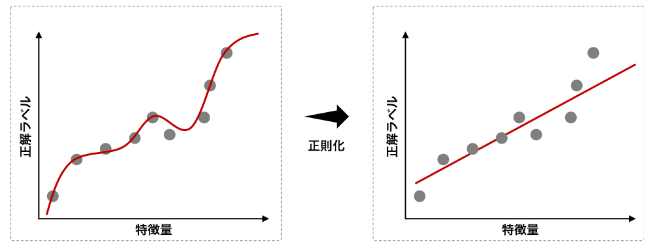

これを防ぐために、Ridge回帰で正則化（パラメータ：alpha）を行い、過学習を防ぐ。<br>
alphaが大きくなるほど、係数（特徴量）は0に近づいていく。<br>
つまり、訓練データへの予測スコアは落ちるが、テストデータは上がる。（汎化性能も向上する）

### Ridge回帰

In [23]:
ridge = Ridge(alpha=1).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [25]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


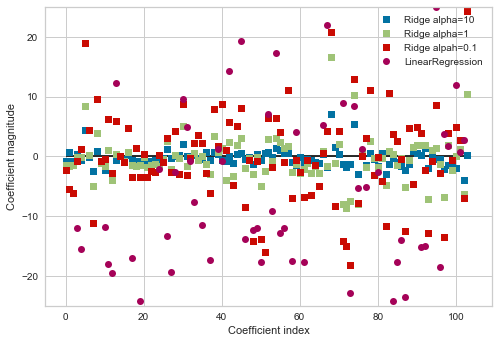

In [26]:
plt.plot(ridge10.coef_, 's', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 's', label='Ridge alpah=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

plt.legend()

横軸：104個の特徴量<br>
縦軸：モデルにおける各係数の大きさ<br>

図より、alpha=1のときが最も係数のばらつきが小さい。<br>
よって汎化性能も高いことが分かる。（上で求めた決定係数も大きい）

また、先ほどはいくつかのalphaを代入して決定係数の比較をしたが<br>
最適なalphaについて、事前に調べる方法もある。

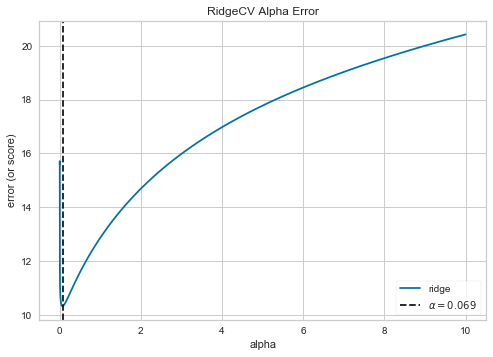

In [27]:
# alphaの探索区間を設定
alphas = np.logspace(-10, 1, 500)

# 訓練データを交差検証、最適な値を求める
ridgeCV = RidgeCV(alphas = alphas)

# alphaのプロット
visualizer = AlphaSelection(ridgeCV)
visualizer.fit(X_train, y_train)

visualizer.show()
plt.show()

In [28]:
ridge0069 = Ridge(alpha=0.069).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


この場合でも、alpha=0.1, 1と同程度の決定係数のスコアが得られることが分かる。

線形回帰とRidge回帰（alpha=1）の比較として、学習曲線をプロットする。

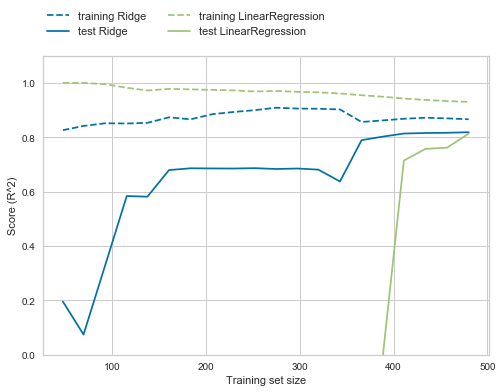

In [29]:
mglearn.plots.plot_ridge_n_samples()

横軸：データサイズ<br>
縦軸：決定係数

線形回帰では過学習を起こしやすいため、訓練データのスコアは高いが<br>
テストデータにおいては、汎化性能がゼロに等しい。

ただしデータサイズ（総量）が十分にあれば<br>
Ridge回帰と同程度の汎化性能を持つことができる。

次にLasso回帰で、モデルの作成を行う。

Ridge回帰と同様に、係数が0に近づくように制約をかけるが<br>
かけ方が少し違い、Lasso回帰はいくつかの係数が完全にゼロとなる。

### Lasso回帰

In [30]:
lasso = Lasso().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [31]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('Traing set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Traing set score: 0.90
Test set score: 0.77
Number of features used: 33


In [32]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Lasso回帰の長所は、特徴量が少ない分、シンプルで分かりやすいモデルを構築できることである。

重要な特徴量の数が分からないようであれば、最初にRidge回帰を行い<br>
不要なものがあると分かれば、Lasso回帰で試してみるのが良い。

最後に、Ridge回帰とLasso回帰について<br>
各係数と値のばらつきについて比較をしておく。

Text(0, 0.5, 'Coefficient magnitude')

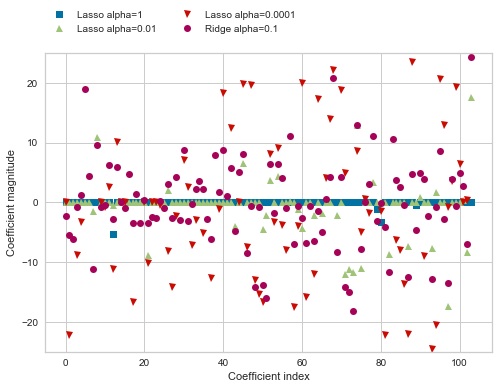

In [33]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

やはり係数のばらつきもある程度は必要であり<br>
Lasso（alpha=0.0001）はRidge（alpha=1）と同程度散らばっているので<br>
決定係数のスコアも近しいことが分かる。

また本テーマからは少し逸れるが、Lasso回帰とは別に、特徴量数を指定するRFEという手法がある。<br>
線形回帰（RFE使用）と比較してみる。

### 線形回帰（RFE）

In [43]:
rfe = RFE(lr, 33)
rfe.fit(X_train, y_train)

rfe.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True])

In [50]:
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

print(X_train_selected.shape)
print(y_train.shape)
print(X_test_selected.shape)
print(y_test.shape)

(379, 33)
(379,)
(127, 33)
(127,)


In [45]:
lr_rfe = LinearRegression().fit(X_train_selected, y_train)

In [46]:
print('Train set score: {}'.format(lr_rfe.score(X_train_selected, y_train)))
print('Test set score: {}'.format(lr_rfe.score(X_test_selected, y_test)))

Train set score: 0.9206064138850879
Test set score: 0.6373154465769999


### Ridge回帰（RFE）

次にRidge回帰でも、RFEを適用してみる。

In [54]:
ridge_rfe = Ridge().fit(X_train_selected, y_train)

In [55]:
print('Train set score: {}'.format(ridge_rfe.score(X_train_selected, y_train)))
print('Test set score: {}'.format(ridge_rfe.score(X_test_selected, y_test)))

Train set score: 0.8087496072709093
Test set score: 0.687762891458681


特徴量を33個に指定した線形回帰やRidge回帰（RFE使用）よりも、Lasso回帰の方がスコアは高い。

具体的な違いについて調べてみると、RFEは特徴量選択における「wrapper method」というものに該当し<br>
Lasso回帰は「embedded method」というものに含まれる。

wrapper method：特徴量の部分集合を取り出し、それらを使ってモデルを訓練し、そのモデルで予測をした誤差を評価していき最適な部分集合を決める。<br>
embedded method：重要度が低い特徴量の係数が0になりやすいように設計された誤差関数を元に訓練して、使用する特徴量を決定する。<br>

今回の趣旨は回帰の違いであり、特徴量選択ではないので、ここまでにしておきます。

### 結論

回帰だけで考えるのであれば、まずはRidge回帰でモデリングをし<br>
不要な特徴量があると分かれば、RFEもしくはLasso回帰を行ってみるのが無難である。

ElasticNet（RidgeとLassoの両方のパラメータを持つ）でも良いが、調整に手間がかかる。

RFEは持っているデータによって使用するかどうか判断し<br>
また、分類でも活用できるので、試してみると良い。

### 参考文献

Pythonではじめる機械学習：https://www.oreilly.co.jp/books/9784873117980/<br>
特徴量選択について：https://qiita.com/fhiyo/items/33b295de64f5a6a047c6